# Resolution of the Laplace equation with transparent boundary conditions (TBC)


We will consider the 1D problem 

\begin{equation}
\begin{cases}
-u''(x) = 1 \ \ in \ \ \Omega = [0,2]\\
u(0) = 0 \\
u(2) = 0
\end{cases}
\end{equation}

whose solution is $u(x) = -\frac{x^2}{2} + x$

and, considering the partition of $\Omega$ in $\Omega_1 = [0,1]$ and $\Omega_2 = [1,2]$, we will solve the problem

\begin{equation}
\begin{cases}
-u_1''(x) = 1 \ \ in \ \ \Omega_1\\
u_1(0) = 0 \\
B(u_1) = 0 \ \ at \ \ \Gamma=\{1\}
\end{cases}
\end{equation}

where the transparent boundary condition $B(u)$ is such that $u|_{\Omega_1} = u_1$.

The TBC is written in the form $B(u) = \frac{\partial}{\partial x}u + D2N(u)$, where the D2N (Dirichlet to Neumann) operator is defined by

$\left. D2N : \alpha(x) \mapsto \frac{\partial}{\partial x}v \right\rvert_\Gamma$

where $\alpha$ is defined in the boundary $\Gamma$. In the case treated here, $\Gamma$ is a point, and therefore $\alpha$ is a scalar.

The function $v$ is solution of

\begin{equation}
\begin{cases}
-v''(x) = 1 \ \ in \ \ \Omega_2\\
v(2) = 0 \\
v(1) = \alpha \ \ at \ \ \Gamma=\{1\}
\end{cases}
\end{equation}

so

$v(x) = -\frac{x^2}{2} + \left(\frac{3}{2} - \alpha \right) + 2\alpha -1$

and 

$\left. \frac{\partial}{\partial x}v \right\rvert_{x=1} = \frac{1}{2} - \alpha$

Finally, the TBC is 

$B(u_1) = \frac{\partial}{\partial x}u_1 + D2N(u_1) = \frac{\partial}{\partial x}u_1+ \frac{1}{2} - u_1$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

10.0


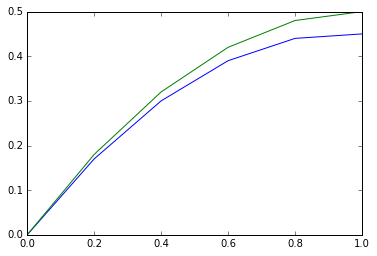

In [11]:
L = 1.

n1 = 5
n2 = 2*n1

dx = L/n1

x1 = np.linspace(0,L,n1+1)
x2 = np.linspace(0,2*L,n2+1)

d1A = -2.*np.ones(n1+1)
d1B = 1*np.ones(n1)

d2A = -2.*np.ones(n2+1)
d2B = 1*np.ones(n2)

M1 = np.diag(d1A) + np.diag(d1B,1) + np.diag(d1B,-1)
M2 = np.diag(d2A) + np.diag(d2B,1) + np.diag(d2B,-1)

M1[0,:] = 0
M1[-1,:] = 0

M2[0,:] = 0
M2[-1,:] = 0

M1[0,0] = 1.
M1[-1,-1] = 1./dx + 1.
M1[-1,-2] = -1./dx


M2[0,0] = 1
M2[-1,-1] = 1

rhs1 = -dx*dx*np.ones(n1+1)
rhs2 = -dx*dx*np.ones(n2+1)

rhs1[0] = 0
rhs1[-1] = 1./2.

rhs2[0] = 0
rhs2[-1] = 0

print(np.linalg.det(M1))
#print(M1)
#print(rhs1)

u1 = np.linalg.solve(M1,rhs1)
u2 = np.linalg.solve(M2,rhs2)

u1exact = -x1*x1/2. + x1
u2exact = -x2*x2/2. + x2


#print(u1,u1exact)

plt.plot(x1,u1)
plt.plot(x1,u1exact)

0.01
[[ 1.     0.     0.     0.     0.     0.   ]
 [ 1.    -2.     1.     0.     0.     0.   ]
 [ 0.     1.    -2.     1.     0.     0.   ]
 [ 0.     0.     1.    -2.     1.     0.   ]
 [ 0.     0.     0.     1.    -2.     1.   ]
 [ 0.     0.     0.     0.    -0.005  0.006]]
[     0. -40000. -40000. -40000. -40000.    500.]
(array([      0.,  170000.,  300000.,  390000.,  440000.,  450000.]), array([      0.,  -19800.,  -79600., -179400., -319200., -499000.]))


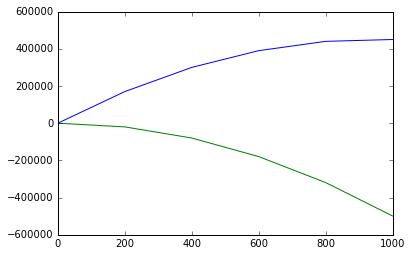

In [12]:
L = 1000

n1 = 5
n2 = 2*n1

dx = L/n1

x1 = np.linspace(0,L,n1+1)
x2 = np.linspace(0,2*L,n2+1)

d1A = -2.*np.ones(n1+1)
d1B = 1*np.ones(n1)

d2A = -2.*np.ones(n2+1)
d2B = 1*np.ones(n2)

M1 = np.diag(d1A) + np.diag(d1B,1) + np.diag(d1B,-1)
M2 = np.diag(d2A) + np.diag(d2B,1) + np.diag(d2B,-1)

M1[0,:] = 0
M1[-1,:] = 0

M2[0,:] = 0
M2[-1,:] = 0

M1[0,0] = 1.
M1[-1,-1] = 1./dx + 1./L
M1[-1,-2] = -1./dx


M2[0,0] = 1
M2[-1,-1] = 1

rhs1 = -dx*dx*np.ones(n1+1)
rhs2 = -dx*dx*np.ones(n2+1)

rhs1[0] = 0
rhs1[-1] = 1./2. * L

rhs2[0] = 0
rhs2[-1] = 0

print(np.linalg.det(M1))
print(M1)
print(rhs1)

u1 = np.linalg.solve(M1,rhs1)
u2 = np.linalg.solve(M2,rhs2)

u1exact = -x1*x1/2. + x1
u2exact = -x2*x2/2. + x2


print(u1,u1exact)

plt.plot(x1,u1)
plt.plot(x1,u1exact)